# Handwritten Digits Classifier on MNIST using different Deep Neuronal Networks architectures

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively. We explore how well different deep neuronal network architectures perform when this task is given.

In [1]:
import tensorflow as tf
from keras.models import Sequential
import numpy as np
import pandas as pd
import keras
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import load_model
from keras.utils import np_utils
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.constraints import maxnorm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
np.random.seed(123)  # for reproducibility

## Explore dataset

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#look at the shape of the dataset
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))
print ("First 10 elements from y_train",y_train[:10])

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)
First 10 elements from y_train [5 0 4 1 9 2 1 3 1 4]


**Details of the "MNIST" dataset**:
- Images are of shape (28,28)
- Training: 60000 pictures
- Test: 10000 pictures
- The images have the same square size of 28×28 pixels and they are grayscale.
- From the description of the dataset in the web site we know that there are 10 classes.
- The classes are represented as unique integers in only 1-dimensional array

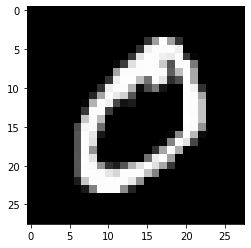

In [4]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

## Load dataset

The ***load dataset*** function does the following actions:
- load the images 
- reshape the data arrays to have a single color channel.
-  use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function.

In [5]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values (Convert 1-dimensional class arrays to 10-dimensional class matrices)
    trainY =  np_utils.to_categorical(trainY)
    testY =  np_utils.to_categorical(testY)
    print ("X_train shape: " + str(trainX.shape))
    print ("Y_train shape: " + str(trainY.shape))
    return trainX, trainY, testX, testY

In [6]:
trainX, trainY, testX, testY = load_dataset()

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


## Prepare data
The pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255. We need to normalize the pixel values of grayscale images, rescale them to the range [0,1]. 
The following function converts the data type from unsigned integers to floats, then dividing the pixel values by the maximum value

In [7]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

## Define Different Deep Neuronal Network Models
In this section, we define different deep neuronal network architectures 

#### Convolutional Neuronal Network (CNN)
This CNN present the following architecture:

CONV2D -> CONV2D -> MAXPOOL -> DROPOUT -> FLATTEN -> FULLYCONNECTED -> DROPOUT -> FULLYCONNECTED(OUTPUT-SOFTMAX)
Optimazer = Adam

In [8]:
# define cnn model
def define_model_CNN():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', input_shape=(26, 26, 32)))
    model.add(BatchNormalization(axis=3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### LeNet - 5

CONV2D (filter 5,5) -> CONV2D -> MAXPOOL -> DROPOUT -> FLATTEN -> FULLYCONNECTED -> DROPOUT -> FULLYCONNECTED(OUTPUT-SOFTMAX) Optimazer = Adam


In [9]:
def LeNet5():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPooling2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    adam = Adam(lr=5e-4)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    return model

#### Logistic Regression
FLATTEN -> FULLYCONNECTED(OUTPUT-SOFTMAX)

Optimazer: Adam

In [10]:
# define logistic_regression with keras
def model_logistic_regresion():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Deep Learning Network (only full connected layer, using regularization L2)
FLATTEN -> FULLYCONNECTED(30 units)->FULLYCONNECTED(20 units)->(FULLYCONNECTED 10(OUTPUT-SOFTMAX))

Optimazer: SGD, using momentum 0.9 y learning rate 0.01

L2 regularization, value 0.001, it could be between 0.0 and 0.1 values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

In [11]:
# define deep learning network with only fully connected layers
def DeepLearningNN():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(30, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the models

In this section, we train and test the models designed to classiy MNIST dataset.

The following function plots the learning behavior on the training and validation test over epochs.

In [12]:
# A plot of accuracy on the training and validation datasets over training epochs.
# A plot of loss on the training and validation datasets over training epochs.
def show_learning_behavior_model(history, name):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(name + ' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(name + ' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

Compare Multiple Models:
------------------------------------------------------------------------
Results of LogisticRegression model
Loss Train = 0.25992169976234436
Train Accuracy = 0.9281499981880188
Loss Test = 0.26976290345191956
Test Accuracy = 0.9251000285148621
------------------------------------------------------------------------


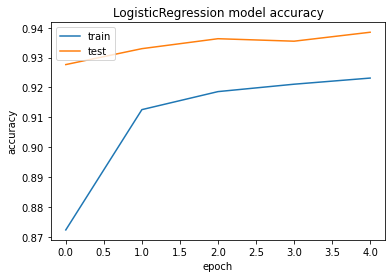

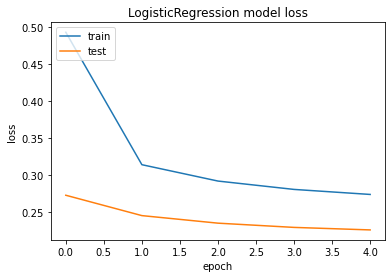

------------------------------------------------------------------------
Results of DeepLearningNN model
Loss Train = 0.20222188532352448
Train Accuracy = 0.9628499746322632
Loss Test = 0.2265630066394806
Test Accuracy = 0.9546999931335449
------------------------------------------------------------------------


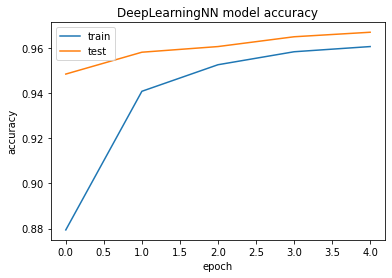

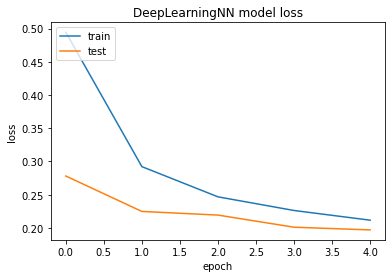

------------------------------------------------------------------------
Results of LeNet5 model
Loss Train = 0.014587096869945526
Train Accuracy = 0.9955333471298218
Loss Test = 0.030751647427678108
Test Accuracy = 0.9904000163078308
------------------------------------------------------------------------


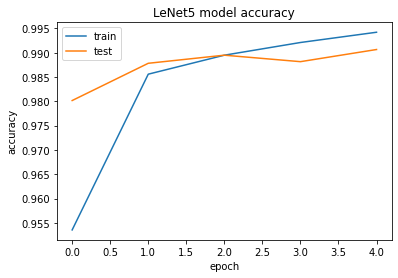

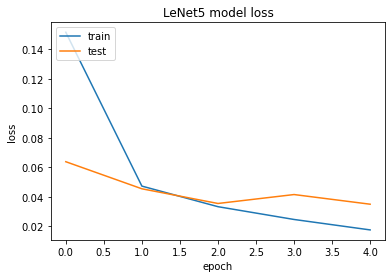

------------------------------------------------------------------------
Results of CNN model
Loss Train = 0.027430124580860138
Train Accuracy = 0.9918500185012817
Loss Test = 0.03979021683335304
Test Accuracy = 0.9890999794006348
------------------------------------------------------------------------


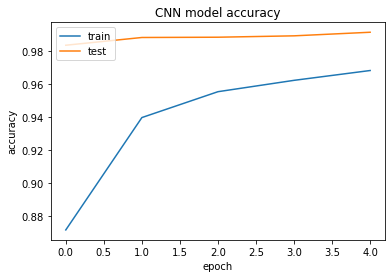

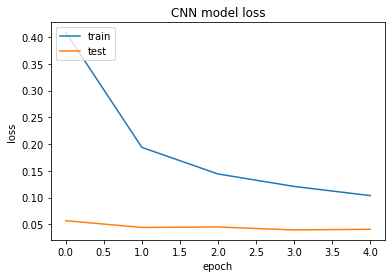

In [13]:
# train and test the models on MNIST dataset
def train_test_NN_Models(trainX, trainY, testX, testY):   
    print('\nCompare Multiple Models:')
    models = []
    models.append(('LogisticRegression', model_logistic_regresion()))
    models.append(('DeepLearningNN', DeepLearningNN()))
    models.append(('LeNet5', LeNet5()))
    models.append(('CNN', define_model_CNN()))
    results_acc_models = {}
    names = []
    for name, model in models:
        results_acc_models.setdefault('model', []).append(name)
        history = model.fit(trainX, trainY, epochs=5, batch_size=32, verbose=0, validation_split=.1)
        model.save(name + '.h5')
        #evaluate the model in train and test sets
        preds_train = model.evaluate(trainX, trainY, verbose=0)
        preds_test = model.evaluate(testX, testY, verbose=0)
        print('------------------------------------------------------------------------')
        print('Results of ' + name + ' model')
        print ("Loss Train = " + str(preds_train[0]))
        print ("Train Accuracy = " + str(preds_train[1]))
        print ("Loss Test = " + str(preds_test[0]))
        print ("Test Accuracy = " + str(preds_test[1]))
        print('------------------------------------------------------------------------')
        results_acc_models.setdefault('acc_train', []).append(preds_train[1])
        results_acc_models.setdefault('acc_test', []).append(preds_test[1])                                                       
        #show learning behavior of the model during training
        show_learning_behavior_model(history, name)
    return results_acc_models

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# create and evaluate the model
results_acc_models = train_test_NN_Models(trainX, trainY, testX, testY)

In [14]:
data_frame_results = pd.DataFrame(results_acc_models) 
data_frame_results

,model,acc_train,acc_test
0,LogisticRegression,0.928150,0.9251
1,DeepLearningNN,0.962850,0.9547
2,LeNet5,0.995533,0.9904
3,CNN,0.991850,0.9891


The convolutional neuronal networks perform better that the deep learning networks with only fully connected layers. LeNet5 obtains the  highest accuracy from test set. However, after the 3th epoch looks like the model present overfitting, since the training set obtain better results that the test one.

## Making predictions on an image

In this section, an image is classified using the model with best performance.

In [15]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    #show image
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
 
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('CNN.h5')
    # predict the class
    digit = model.predict(img).argmax(axis=-1)
    print(digit)

[7]


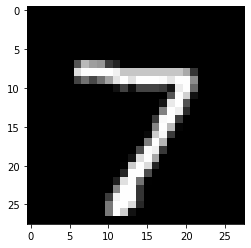

In [16]:
#entry point, run the example
run_example()